In [1]:
import pandas as pd
import numpy as np

In [3]:
df_train=pd.read_csv('fashionmnist/fashion-mnist_train.csv')
df_test=pd.read_csv('fashionmnist/fashion-mnist_test.csv')

df=pd.concat([df_train,df_test],ignore_index=True)

In [4]:
# Defining m
m=5000

sampled_points = df.sample(n=m, replace=True)
sampled_points

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
62223,8,0,0,0,0,0,0,0,0,0,...,142,143,167,2,0,0,0,0,0,0
39121,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24985,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55458,1,0,0,0,0,0,0,0,0,0,...,213,104,0,0,0,0,0,0,0,0
31018,1,0,0,0,0,0,0,0,0,0,...,37,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42952,2,0,0,0,0,0,0,0,0,0,...,2,0,31,155,109,21,0,0,0,0
27065,4,0,0,0,0,0,0,0,0,0,...,0,0,2,2,2,0,0,0,0,0
13870,4,0,0,0,0,0,0,0,0,0,...,23,1,0,0,46,176,172,37,0,0
37546,6,0,0,0,0,0,0,0,1,0,...,0,0,0,5,22,13,67,0,0,0


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2, random_state=42)
pca.fit(df.drop('label',axis=1))
label_encoder = LabelEncoder()
label_encoder.fit(df['label'])

LabelEncoder()

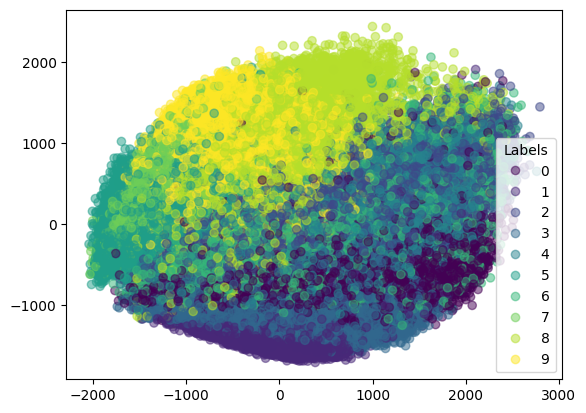

In [7]:
data_2d = pca.transform(df.drop('label',axis=1))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(df['label'])
labels = label_encoder.transform(df['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

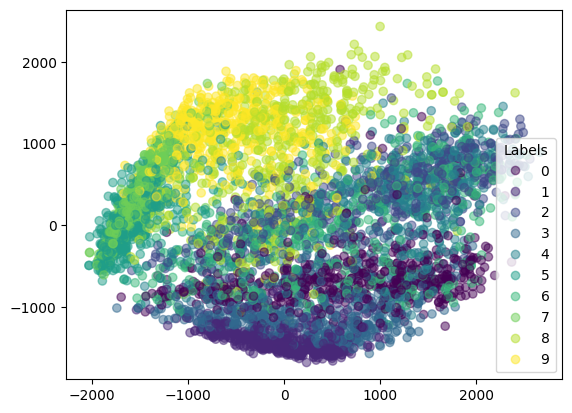

In [8]:
data_2d = pca.transform(sampled_points.drop('label',axis=1))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=sampled_points['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(sampled_points['label'])
labels = label_encoder.transform(sampled_points['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

In [11]:
# apply kmeans on this sampled points
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score
kmeans = KMeans(n_clusters=10, random_state=0)

In [12]:
rand_score(kmeans.fit_predict(sampled_points.drop('label',axis=1)),sampled_points['label'])

0.8761872374474895